In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('German_Credit_Score_Gender.xlsx')
df=df.drop(['Unnamed: 21'],axis=1)

In [3]:
df.rename(columns={'Status of existing checking account':'Status'},inplace=True)
df.rename(columns={'Duration in months':'Months'},inplace=True)
df.rename(columns={'Installment rate in percentage of disposable income':'Installment rate of income'},inplace=True)
df.rename(columns={'Number of existing credits at this bank':'Number of existing credits'},inplace=True)
df.rename(columns={'Number of people being liable to provide maintenance for':'Liable to provide maintenance for'},inplace=True)
df.rename(columns={'Personal status and sex':'Gender'},inplace=True)
df.rename(columns={'?':'ClassLabel'},inplace=True)

In [4]:
df_new = pd.read_excel('German_Credit_Score_Gender.xlsx')
df_new = df_new.drop(['Unnamed: 21'],axis=1)

In [5]:
df_new.rename(columns={'Status of existing checking account':'Status'},inplace=True)
df_new.rename(columns={'Duration in months':'Months'},inplace=True)
df_new.rename(columns={'Installment rate in percentage of disposable income':'Installment rate of income'},inplace=True)
df_new.rename(columns={'Number of existing credits at this bank':'Number of existing credits'},inplace=True)
df_new.rename(columns={'Number of people being liable to provide maintenance for':'Liable to provide maintenance for'},inplace=True)
df_new.rename(columns={'Personal status and sex':'Gender'},inplace=True)
df_new.rename(columns={'?':'ClassLabel'},inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [9]:
#Features to perform Decision Tree Classifier while excluding demographics
feature_new = df.drop(['Gender', 'Age in years', 'Job', 'Housing','Telephone', 'Present employee since', 'Property', 'foreign worker'],axis =1)
feature_new['Credit History'] = LE.fit_transform(feature_new['Credit History'])
feature_new['Credit Amount'] = LE.fit_transform(feature_new['Credit Amount'])
feature_new['Other debtors / guarantors'] = LE.fit_transform(feature_new['Other debtors / guarantors'])
feature_new['Number of existing credits'] = LE.fit_transform(feature_new['Number of existing credits'])
feature_new['Status'] = LE.fit_transform(feature_new['Status'])
feature_new['Months'] = LE.fit_transform(feature_new['Months'])
feature_new['Purpose'] = LE.fit_transform(feature_new['Purpose'])
feature_new['Saving Account/Bonds'] = LE.fit_transform(feature_new['Saving Account/Bonds'])
feature_new['Installment rate of income'] = LE.fit_transform(feature_new['Installment rate of income'])
feature_new['Present residence since'] = LE.fit_transform(feature_new['Present residence since'])
feature_new['Other installment plans'] = LE.fit_transform(feature_new['Other installment plans'])
feature_new['Liable to provide maintenance for'] = LE.fit_transform(feature_new['Liable to provide maintenance for'])

In [10]:
features_new_cols = ['Status', 'Months', 'Credit History', 'Purpose', 'Credit Amount', 'Saving Account/Bonds', 'Installment rate of income', 'Other debtors / guarantors', 'Present residence since', 'Other installment plans', 'Number of existing credits', 'Liable to provide maintenance for']
Xd = feature_new[features_new_cols]
yd = feature_new.ClassLabel

In [11]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd,yd,test_size = 0.25, random_state = 0)

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()
yd = dtc.fit(Xd_test, yd_test)
yd_pred=yd.predict(Xd_test)

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(yd, Xd_test, yd_test)
print(scores)

[0.67857143 0.66666667 0.68292683]


In [13]:
ClassLabel_Classifier_new = pd.DataFrame(yd_pred)

df1_new = pd.concat([df_new, ClassLabel_Classifier_new], axis=1, join='inner')

df1_new.columns.values[21] = "ClassLabel1"

In [14]:
df1_new

,Status,Months,Credit History,Purpose,Credit Amount,Saving Account/Bonds,Present employee since,Installment rate of income,Gender,Other debtors / guarantors,...,Age in years,Other installment plans,Housing,Number of existing credits,Job,Liable to provide maintenance for,Telephone,foreign worker,ClassLabel,ClassLabel1
0,A11,6,A34,A43,1169,A65,A75,4,Male,A101,...,67,A143,A152,2,A173,1,A192,A201,1,1
1,A12,48,A32,A43,5951,A61,A73,2,Female,A101,...,22,A143,A152,1,A173,1,A191,A201,2,1
2,A14,12,A34,A46,2096,A61,A74,2,Male,A101,...,49,A143,A152,1,A172,2,A191,A201,1,1
3,A11,42,A32,A42,7882,A61,A74,2,Male,A103,...,45,A143,A153,1,A173,2,A191,A201,1,1
4,A11,24,A33,A40,4870,A61,A73,3,Male,A101,...,53,A143,A153,2,A173,2,A191,A201,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,A14,24,A32,A49,1258,A61,A74,4,Male,A101,...,25,A143,A152,1,A173,1,A192,A201,1,1
246,A14,12,A34,A43,717,A61,A75,4,Male,A101,...,52,A143,A152,3,A173,1,A191,A201,1,1
247,A14,6,A30,A40,1204,A62,A73,4,Male,A101,...,35,A141,A151,1,A173,1,A191,A202,1,1
248,A13,24,A32,A42,1925,A61,A73,2,Male,A101,...,26,A143,A152,1,A173,1,A191,A201,1,1


In [15]:
#Features to perform logistic regression on fair features
features = df.drop(['Status','Months','Purpose','Saving Account/Bonds','Present employee since','Installment rate of income','Gender','Present residence since','Property','Age in years','Other installment plans','Housing','Job','Liable to provide maintenance for','Telephone','foreign worker'],axis=1)
features['Credit History'] = LE.fit_transform(features['Credit History'])
features['Credit Amount'] = LE.fit_transform(features['Credit Amount'])
features['Other debtors / guarantors'] = LE.fit_transform(features['Other debtors / guarantors'])
features['Number of existing credits'] = LE.fit_transform(features['Number of existing credits'])

In [16]:
feature_cols = ['Credit History', 'Credit Amount', 'Other debtors / guarantors', 'Number of existing credits']
X = features[feature_cols] # Features
y = features.ClassLabel

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
y = logreg.fit(X_test,y_test)

#
y_pred=y.predict(X_test)

In [18]:
y_pred_prob=y.predict_proba(X)

ClassLabel_Classifier = pd.DataFrame(y_pred)
Predictions = pd.DataFrame(y_pred_prob)

df1 = pd.concat([df, ClassLabel_Classifier, Predictions], axis=1, join='inner')

In [19]:
from sklearn.model_selection import cross_val_score
scores_linear = cross_val_score(yd, Xd_test, yd_test)
print(scores_linear)

[0.66666667 0.71428571 0.68292683]


In [20]:
df1.rename(columns={0: 'ClassLabel_Predicted'}, inplace=True)

In [21]:
df1.columns.values[22] = "Prediction1"
df1.columns.values[23] = "Prediction2"

In [22]:
df1.head()

,Status,Months,Credit History,Purpose,Credit Amount,Saving Account/Bonds,Present employee since,Installment rate of income,Gender,Other debtors / guarantors,...,Housing,Number of existing credits,Job,Liable to provide maintenance for,Telephone,foreign worker,ClassLabel,ClassLabel_Predicted,Prediction1,Prediction2
0,A11,6,A34,A43,1169,A65,A75,4,Male,A101,...,A152,2,A173,1,A192,A201,1,1,0.842740,0.157260
1,A12,48,A32,A43,5951,A61,A73,2,Female,A101,...,A152,1,A173,1,A191,A201,2,1,0.613907,0.386093
2,A14,12,A34,A46,2096,A61,A74,2,Male,A101,...,A152,1,A172,2,A191,A201,1,1,0.813864,0.186136
3,A11,42,A32,A42,7882,A61,A74,2,Male,A103,...,A153,1,A173,2,A191,A201,1,1,0.591507,0.408493
4,A11,24,A33,A40,4870,A61,A73,3,Male,A101,...,A153,2,A173,2,A191,A201,2,1,0.697538,0.302462


In [23]:
Male=df1[df1['Gender'] == 'Male']
Female=df1[df1['Gender'] == 'Female']

In [24]:
Male

,Status,Months,Credit History,Purpose,Credit Amount,Saving Account/Bonds,Present employee since,Installment rate of income,Gender,Other debtors / guarantors,...,Housing,Number of existing credits,Job,Liable to provide maintenance for,Telephone,foreign worker,ClassLabel,ClassLabel_Predicted,Prediction1,Prediction2
0,A11,6,A34,A43,1169,A65,A75,4,Male,A101,...,A152,2,A173,1,A192,A201,1,1,0.842740,0.157260
2,A14,12,A34,A46,2096,A61,A74,2,Male,A101,...,A152,1,A172,2,A191,A201,1,1,0.813864,0.186136
3,A11,42,A32,A42,7882,A61,A74,2,Male,A103,...,A153,1,A173,2,A191,A201,1,1,0.591507,0.408493
4,A11,24,A33,A40,4870,A61,A73,3,Male,A101,...,A153,2,A173,2,A191,A201,2,1,0.697538,0.302462
5,A14,36,A32,A46,9055,A65,A73,2,Male,A101,...,A153,1,A172,2,A192,A201,1,1,0.594037,0.405963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,A11,48,A30,A41,4605,A61,A75,3,Male,A101,...,A153,2,A173,2,A191,A201,2,1,0.453286,0.546714
245,A14,24,A32,A49,1258,A61,A74,4,Male,A101,...,A152,1,A173,1,A192,A201,1,1,0.723578,0.276422
246,A14,12,A34,A43,717,A61,A75,4,Male,A101,...,A152,3,A173,1,A191,A201,1,1,0.852325,0.147675
247,A14,6,A30,A40,1204,A62,A73,4,Male,A101,...,A151,1,A173,1,A191,A202,1,1,0.571740,0.428260


In [25]:
Maled_new=df1_new[df1_new['Gender'] == 'Male']
Femaled_new=df1_new[df1_new['Gender'] == 'Female']

In [26]:
del new_male
del new_female

NameError: name 'new_male' is not defined

In [27]:
new_female

NameError: name 'new_female' is not defined

In [28]:
new_male

NameError: name 'new_male' is not defined

In [29]:
column_names = ["Status", "Months", "CreditHistory","Purpose", "CreditAmount", "SavingAccount/Bonds", "Presentemployeesince", "Installmentrateofincome", "Gender", "Otherdebtors/guarantors", "Present residence since", "Property", "Age in years", "Other installment plans", "Housing", "Numberofexistingcredits", "Job", "Liabletoprovidemaintenancefor", "Telephone", "foreignworker", "ClassLabel", "ClassLabel_Predicted", "Prediction1", "Prediction2"]

new_male = pd.DataFrame(columns = column_names)

In [30]:
new_male

,Status,Months,CreditHistory,Purpose,CreditAmount,SavingAccount/Bonds,Presentemployeesince,Installmentrateofincome,Gender,Otherdebtors/guarantors,...,Housing,Numberofexistingcredits,Job,Liabletoprovidemaintenancefor,Telephone,foreignworker,ClassLabel,ClassLabel_Predicted,Prediction1,Prediction2


In [31]:
column_names = ["Status", "Months", "CreditHistory","Purpose", "CreditAmount", "SavingAccount/Bonds", "Presentemployeesince", "Installmentrateofincome", "Gender", "Otherdebtors/guarantors", "Present residence since", "Property", "Age in years", "Other installment plans", "Housing", "Numberofexistingcredits", "Job", "Liabletoprovidemaintenancefor", "Telephone", "foreignworker", "ClassLabel", "ClassLabel_Predicted", "Prediction1", "Prediction2"]

new_female = pd.DataFrame(columns = column_names)

In [32]:
new_female

,Status,Months,CreditHistory,Purpose,CreditAmount,SavingAccount/Bonds,Presentemployeesince,Installmentrateofincome,Gender,Otherdebtors/guarantors,...,Housing,Numberofexistingcredits,Job,Liabletoprovidemaintenancefor,Telephone,foreignworker,ClassLabel,ClassLabel_Predicted,Prediction1,Prediction2


In [33]:
t = 0.05

for x in range(len(Female)):
    z = Female['Prediction1'].iloc[x]
    min_diff=20
    min_posn=2500
    for y in range(len(Male)):
        a = Male['Prediction1'].iloc[y]
        diff = abs(z-a)
        if(diff<t):
            if(diff<min_diff):
                min_diff=diff
                min_posn=y
    new_male=new_male.append(Male.iloc[min_posn])
    Male = Male.drop(Male.index[min_posn]) 
    new_female = new_female.append(Female.iloc[x])

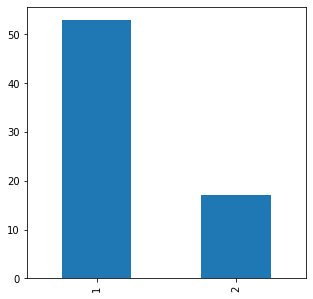

In [34]:
new_male['ClassLabel'].value_counts().plot(kind='bar',figsize=(5, 5))

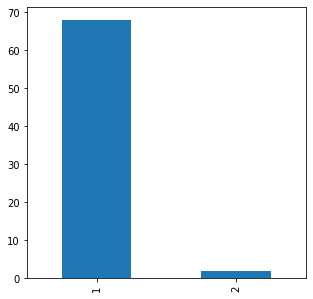

In [35]:
Female['ClassLabel_Predicted'].value_counts().plot(kind='bar',figsize=(5, 5))

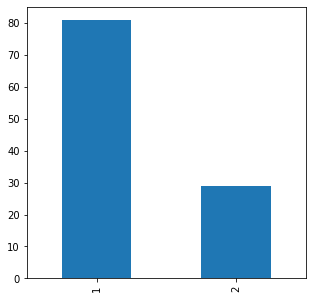

In [36]:
Male['ClassLabel'].value_counts().plot(kind='bar',figsize=(5, 5))

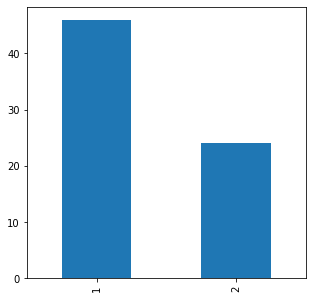

In [37]:
Female['ClassLabel'].value_counts().plot(kind='bar',figsize=(5, 5))

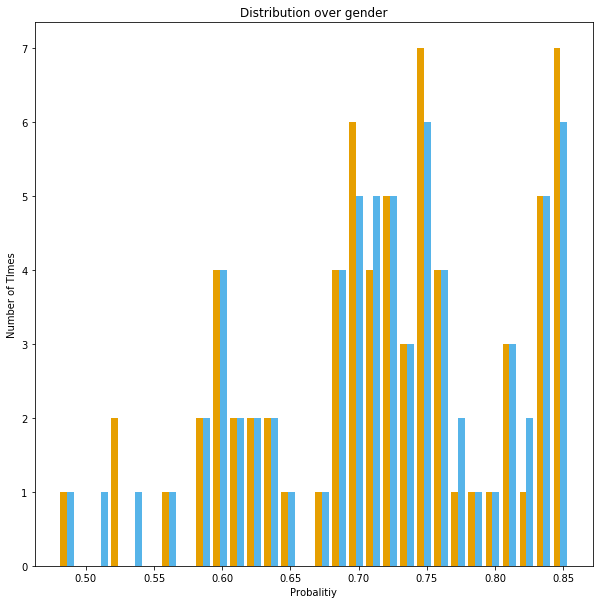

In [49]:
#Distribution over gender
# Make a separate list for each gender
x1 = list(new_male['Prediction1'])
x2 = list(Female['Prediction1'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9']
names = ['Male', 'Female']

plt.hist([x1,x2], color = colors, density=False,
         bins = int(30))
plt.title('Distribution over gender')
plt.xlabel("Probalitiy")
plt.ylabel("Number of TImes")

from pylab import rcParams
rcParams['figure.figsize'] = 8,8

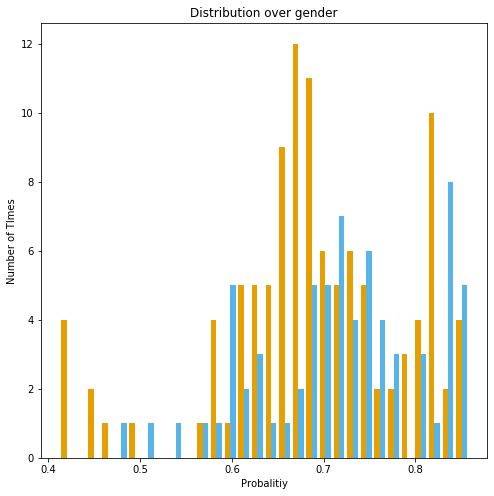

In [51]:
#Distribution over gender before 
# Make a separate list for each gender
y1 = list(Male['Prediction1'])
y2 = list(Female['Prediction1'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9']
names = ['Male', 'Female']

plt.hist([y1,y2], color = colors, density=False,
         bins = int(30), label=names)
plt.title('Distribution over gender')
plt.xlabel("Probalitiy")
plt.ylabel("Number of TImes")

from pylab import rcParams
rcParams['figure.figsize'] = 8,8

In [52]:
Maled_new_1 = Maled_new[Maled_new['ClassLabel1'] == 1] #decision tree
Femaled_new_1 = Femaled_new[Femaled_new['ClassLabel1'] == 1] #decision tree
Male_1 = new_male[new_male['ClassLabel_Predicted'] == 1] #matched
Female_1 = Female[Female['ClassLabel_Predicted']==1]#matched

In [53]:
pos_fem_dec = len(Femaled_new_1)
pos_mal_dec = len(Maled_new_1)
pos_mal_mat = len(Male_1)
pos_fem_mat = len(Female_1)
tot_fem_dec = len(Femaled_new)
tot_mal_dec = len(Maled_new)
tot_fem_mat = len(new_female)
tot_mal_mat = len(new_male)

users with the positive class / # users, for each demographic. 

In [54]:
h = pos_fem_dec/tot_fem_dec
print(h)

0.7142857142857143


In [55]:
h1 = pos_mal_dec/tot_mal_dec
print(h1)

0.7


In [56]:
h2 = pos_mal_mat/tot_mal_mat
print(h2)

0.9857142857142858


In [57]:
h3 = pos_fem_mat/tot_fem_mat
print(h3)

0.9714285714285714


In [58]:
p_percent_dec = (pos_fem_dec/pos_mal_dec)*100
print(p_percent_dec)

39.682539682539684


In [59]:
p_percent_mat = (pos_fem_mat/pos_mal_mat)*100
print(p_percent_mat)

98.55072463768117
